In [3]:
import os
import pandas as pd
from importlib import reload
import laspy
import numpy as np
import rasterio as rio

In [4]:
# Path to the data
label_path = './data/split_maps/'

dir_path = './data/raw/RemoteSensing'
hsi_path = os.path.join(dir_path, 'HSI')
chm_path = os.path.join(dir_path, 'CHM')
las_path = os.path.join(dir_path, 'LAS')

In [8]:

%cd ../
import data.data_preprocess as dp
reload(dp)


/Users/clemencegranade/Documents/ift6759/tree_proj/ift6759_trees


<module 'data.data_preprocess' from '/Users/clemencegranade/Documents/ift6759/tree_proj/ift6759_trees/data/data_preprocess.py'>

In [9]:
reload(dp)
hpd = dp.HyperSpectralData(chm_path)

In [10]:
hpd.load_labels(label_path)
hpd.get_split()

(['MLBS_1',
  'MLBS_10',
  'MLBS_11',
  'MLBS_12',
  'MLBS_13',
  'MLBS_15',
  'MLBS_16',
  'MLBS_17',
  'MLBS_18',
  'MLBS_19',
  'MLBS_2',
  'MLBS_21',
  'MLBS_22',
  'MLBS_23',
  'MLBS_24',
  'MLBS_26',
  'MLBS_27',
  'MLBS_28',
  'MLBS_29',
  'MLBS_3',
  'MLBS_30',
  'MLBS_31',
  'MLBS_32',
  'MLBS_33',
  'MLBS_35',
  'MLBS_36',
  'MLBS_37',
  'MLBS_38',
  'MLBS_40',
  'MLBS_41',
  'MLBS_43',
  'MLBS_45',
  'MLBS_46',
  'MLBS_5',
  'MLBS_6',
  'MLBS_8',
  'OSBS_1',
  'OSBS_10',
  'OSBS_11',
  'OSBS_13',
  'OSBS_15',
  'OSBS_17',
  'OSBS_18',
  'OSBS_19',
  'OSBS_2',
  'OSBS_20',
  'OSBS_21',
  'OSBS_22',
  'OSBS_25',
  'OSBS_28',
  'OSBS_29',
  'OSBS_3',
  'OSBS_30',
  'OSBS_31',
  'OSBS_33',
  'OSBS_34',
  'OSBS_36',
  'OSBS_37',
  'OSBS_38',
  'OSBS_39',
  'OSBS_4',
  'OSBS_5',
  'OSBS_6',
  'OSBS_7',
  'OSBS_8',
  'OSBS_9'],
 ['MLBS_20',
  'MLBS_25',
  'MLBS_34',
  'MLBS_39',
  'MLBS_42',
  'MLBS_9',
  'OSBS_35',
  'OSBS_26',
  'OSBS_32'],
 ['MLBS_14',
  'MLBS_4',
  'MLBS_44',
 

# Loading Hyperspectral

In [5]:
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show

In [100]:
# fn = hpd.y_train




In [129]:
hpd.y_train.groupby('rsFile').count().shape

(66, 6)

In [134]:


splits_combined = hpd.train_im + hpd.test_im + hpd.valid_im
splits_combined = [x+'.tif' for x in splits_combined]
print(len(os.listdir(dir_path)))
print(len(splits_combined))

(set(os.listdir(dir_path)).difference(splits_combined))
# {'MLBS_7.tif'} --> Missing delineation


85
84


{'MLBS_7.tif'}

In [128]:
len(hpd.train_im)
train_imt = hpd.y_train['rsFile'].unique()
train_imt = [x.split('.')[0] for x in train_imt]

print(len(set(hpd.train_im)))
print(len(set(hpd.test_im)))
print(len(set(hpd.valid_im)))

# print(hpd.train_im)
# len(hpd.test_im)

66
9
9


In [6]:
def read_tif(hpd, nb:int, dir_path:str):
    fn = hpd.train_im[nb] +'.tif'
    fp = os.path.join(dir_path, fn)
    lidar_dem = rio.open(fp)
    print(lidar_dem.profile)
    print(lidar_dem.read().shape)
    return lidar_dem

def read_las(hpd, nb:int, dir_path:str):
    fn = hpd.train_im[nb] +'.las'
    fp = os.path.join(dir_path, fn)
    lidar_dem = laspy.read(fp)
    print(lidar_dem)
    print(list(lidar_dem.point_format.dimension_names))
    print(set(lidar_dem.classification))
    print(lidar_dem.xyz.shape)

    return lidar_dem



### LAS DATA

*https://www.neonscience.org/resources/learning-hub/tutorials/neon-discrete-point-clouds*

In [11]:
chm_eg = read_tif(hpd, 0, chm_path)

hsi_eg = read_tif(hpd, 0, hsi_path)
las = read_las(hpd, 29, las_path)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 20, 'height': 20, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 542055.0,
       0.0, -1.0, 4134999.0), 'blockysize': 20, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
(1, 20, 20)
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 20, 'height': 20, 'count': 369, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 542055.0,
       0.0, -1.0, 4134999.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
(369, 20, 20)
<LasData(1.3, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 8701 points, 2 vlrs)>
['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time']
{1, 2, 5}
(8701, 3)


In [14]:
chm_eg.shape

(20, 20)

(array([1, 2, 5], dtype=uint8), array([  90, 1827, 6784]))


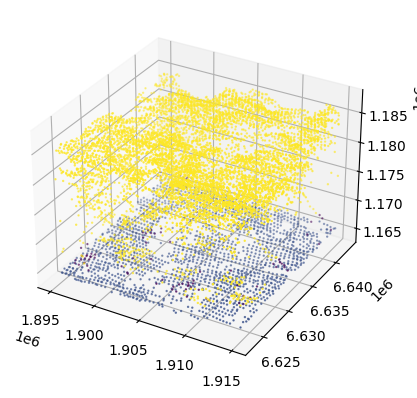

In [68]:
point_data = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))
classes = np.array(las.classification)
print(np.unique(classes, return_counts=True))
ax = plt.axes(projection='3d')
ax.scatter(point_data[:,0], point_data[:,1], point_data[:,2], c = classes, s=0.5)
plt.show()

### CHM

In [19]:
fn = hpd.train_im[0] +'.tif'
fp = os.path.join(chm_path, fn)
chm  = rio.open(os.path.join(chm_path, fn))
lidar_dem.profile



NameError: name 'lidar_dem' is not defined

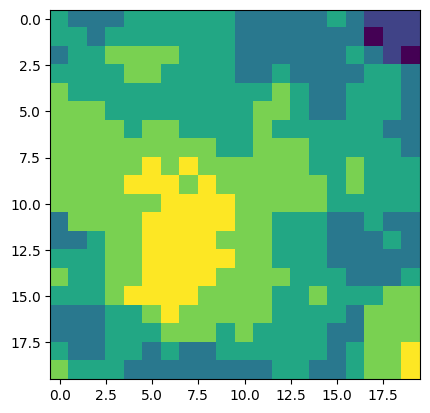

In [21]:

import cv2
img = cv2.imread(fp,-1)
test = np.array(img).astype(int)
plt.imshow(test)

TypeError: Image data of dtype object cannot be converted to float

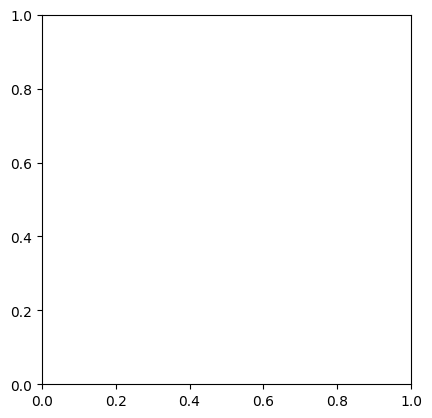

In [18]:
plt.imshow(chm)

## Plot 1 band with Rasterio

CPU times: user 35.2 ms, sys: 4.63 ms, total: 39.8 ms
Wall time: 41 ms


<AxesSubplot: >

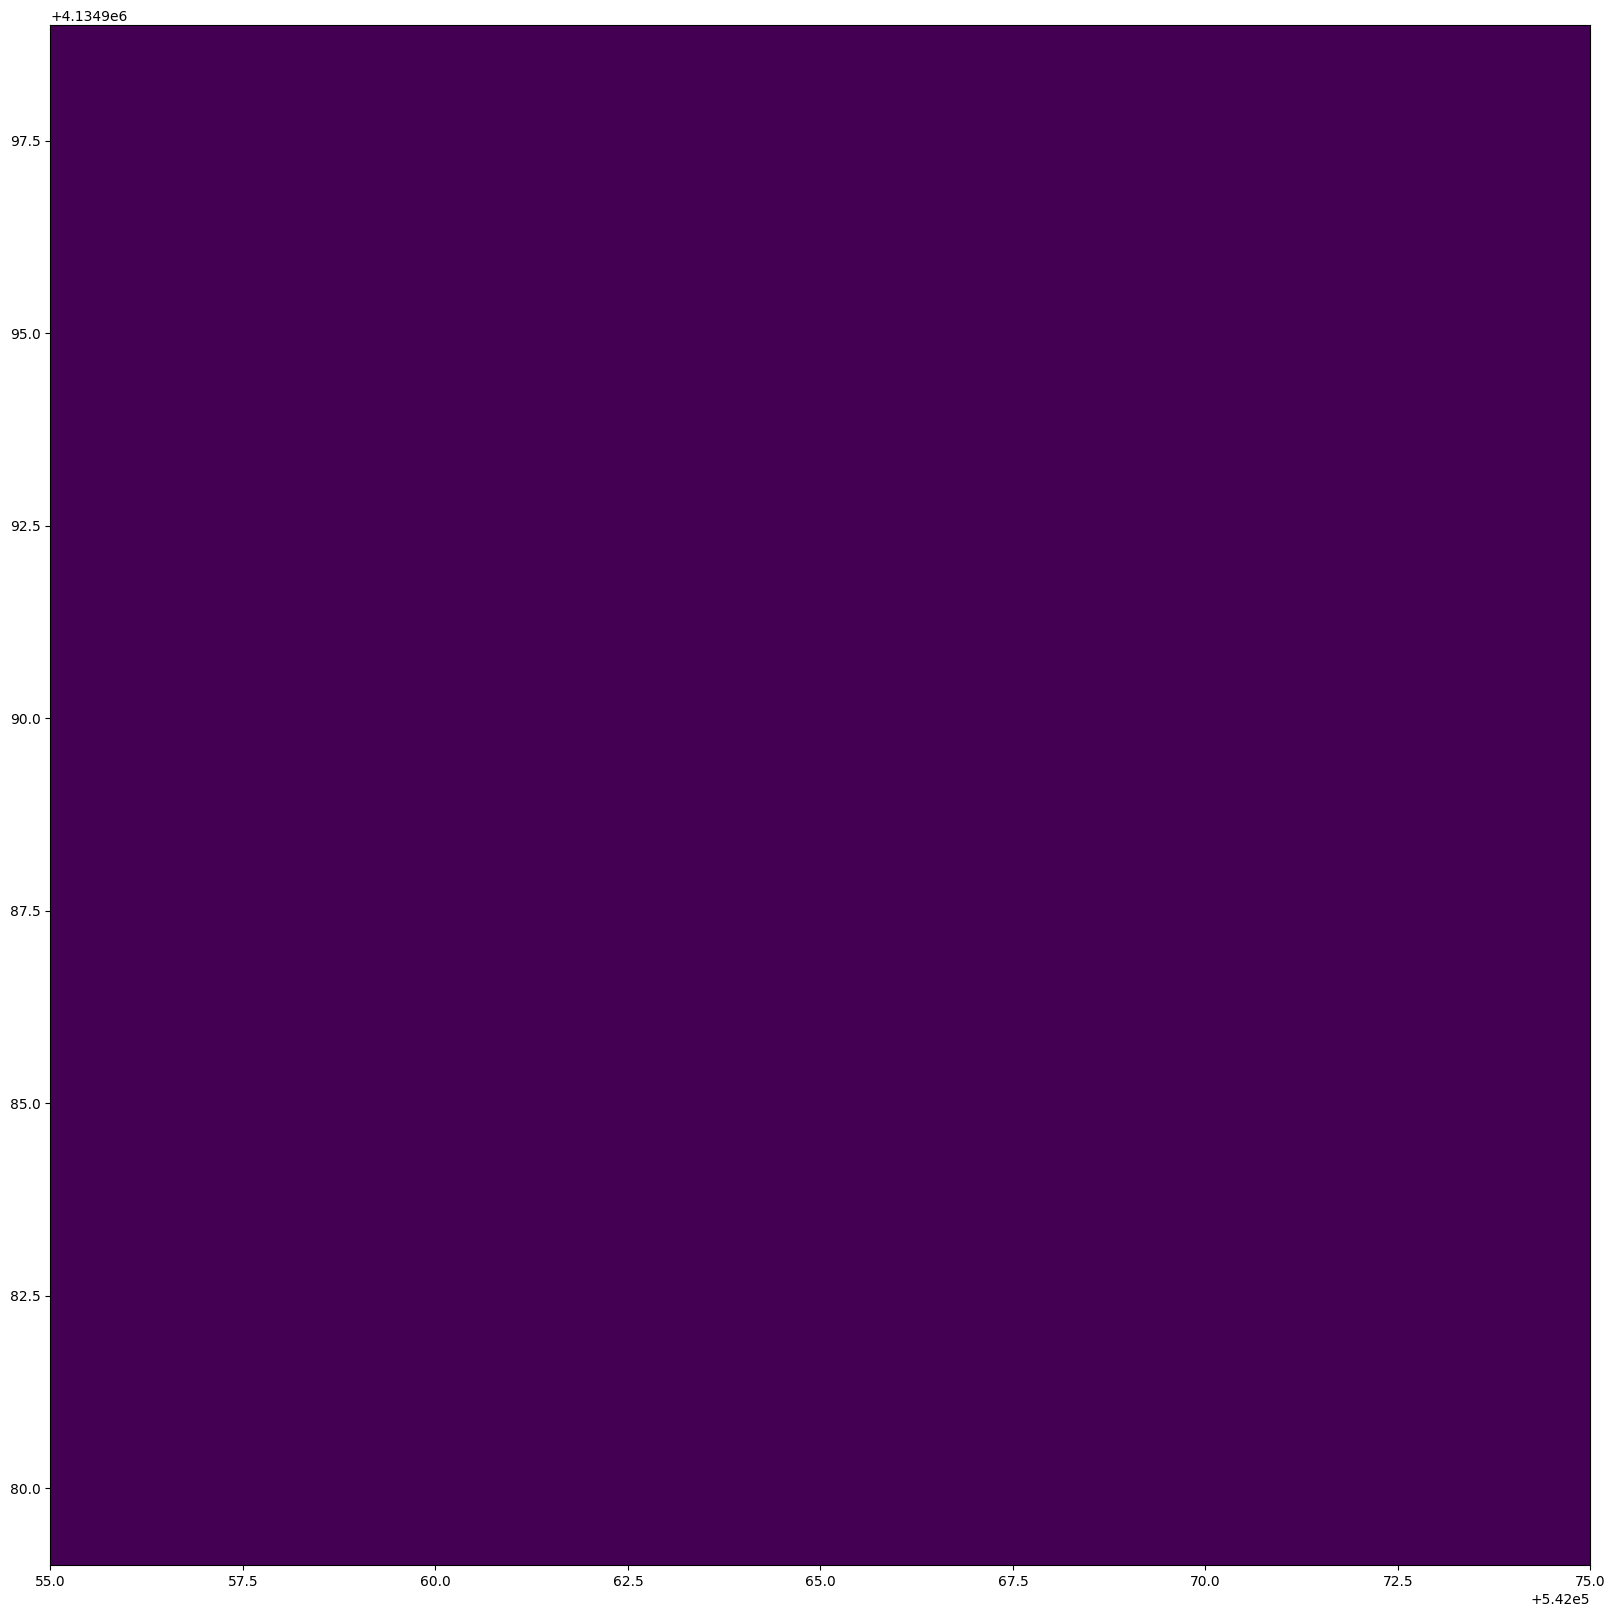

In [140]:
%%time
fig, ax = plt.subplots(figsize = (20,20))
show(lidar_dem, 
    # title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
    ax=ax)


## Plot Multiple bands with earthly

In [109]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [138]:
with rio.open(fp) as src:
    # convert / read the data into a numpy array:
    lidar_dem_im = src.read(40, masked= True)
    sjer_ext = rio.plot.plotting_extent(src)



In [148]:
lidar_dem.read(1,masked=True).max()


0

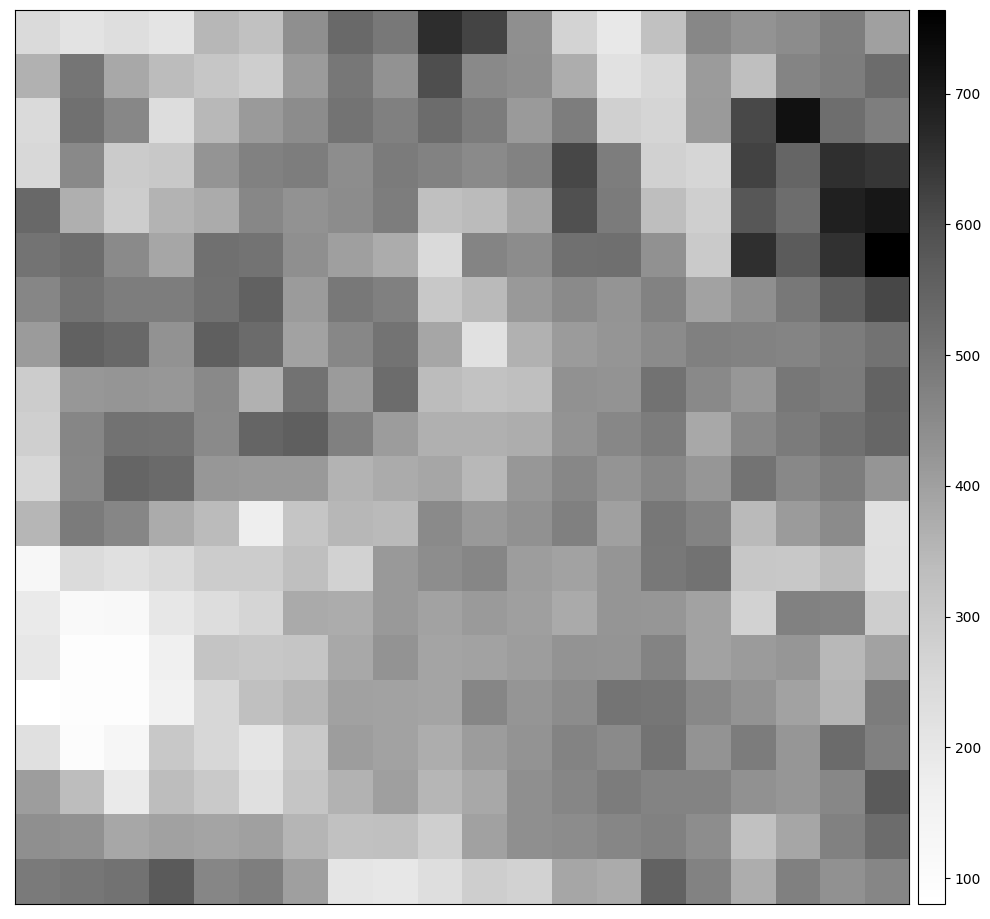

CPU times: user 436 ms, sys: 41.9 ms, total: 477 ms
Wall time: 550 ms


<AxesSubplot: >

In [141]:
%%time

ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=sjer_ext,
              cbar=True)

In [123]:
with rio.open(fp) as src:
    # convert / read the data into a numpy array:
    lidar_dem_im = src.read(300, masked= True)
    sjer_ext = rio.plot.plotting_extent(src)

In [152]:
ep.hist(lidar_dem.read(),
        bins=100,
        # ti
        #tle="Lee Hill Road - Digital Elevation (terrain) Model - \nDistribution of Elevation Values"
)
plt.show()

KeyboardInterrupt: 

In [34]:
chm.read().shape

(1, 1000, 1000)